In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import lognorm

3.2843421893016322


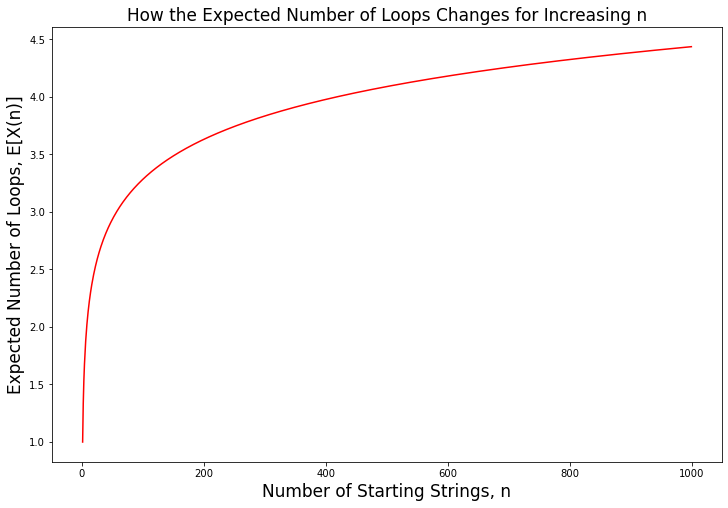

In [2]:
### Implementing exact formula for exptected number of loops
def exp_loops(n):
    value=0
    for i in range(1,n+1):
        value += 1/((2*i)-1)
    return value

# testing for 100 starting strings
print(exp_loops(100))

# plotting expected number of loops as n increases
n_range = np.arange(1,1000,1)
expec = []
for i in n_range:
    expec.append(exp_loops(i))

plt.figure(figsize=(12,8))
plt.plot(n_range, expec,'r')
plt.xlabel('Number of Starting Strings, n', size=17)
plt.ylabel('Expected Number of Loops, E[X(n)]', size=17)
plt.title('How the Expected Number of Loops Changes for Increasing n', size=17)
plt.show()

Simulated average for 100 starting strings over 1000 iterations is 3.312
With our exact figure above this has absolute error 0.02765781069836759


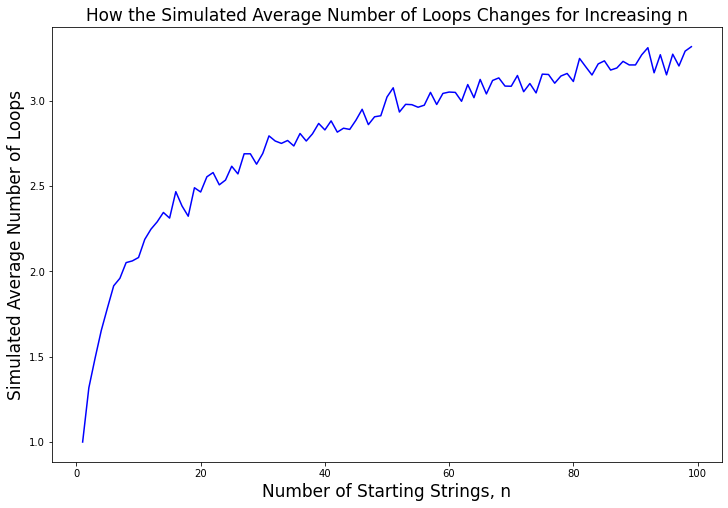

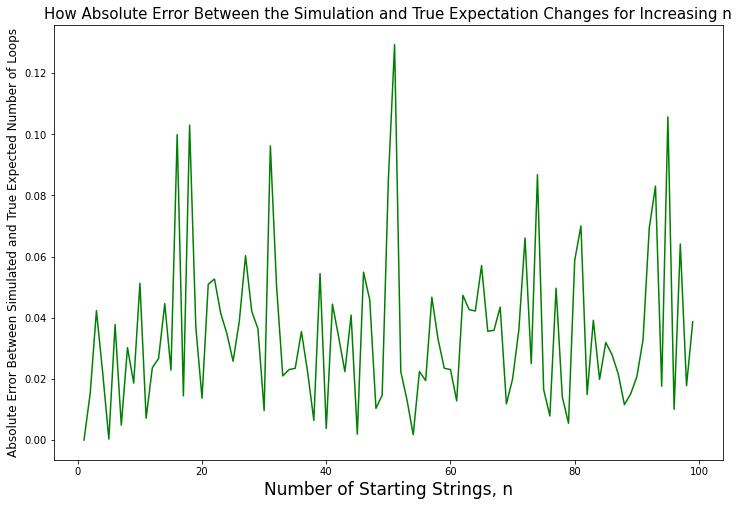

The largest error between the simulated and exact expected number of loops is 0.12932416142608316


In [3]:
### Simulation of Game and Monte Carlo Methods to Approximate Expected Value
# making simulation of one process
def process_sim(n):
    ends=[]
    loops = 0
    new_num = n+1
    for i in range(1,n+1):
        ends.append(i)
        ends.append(i)
    while len(ends)>0:
        end1 = random.choice(ends)
        ends.remove(end1)
        end2 = random.choice(ends)
        ends.remove(end2)
        if end1==end2:
            loops += 1
        else:
            ends.remove(end1)
            ends.remove(end2)
            ends.append(new_num)
            ends.append(new_num)
            new_num += 1
    return loops

# simulating process a given number of times
def sim_average(n, iterations):
    count = 0
    for _ in range(0,iterations):
        count += process_sim(n)
    average = count/iterations
    return average

# simulation average for 100 starting strings over 1000 iterations
test_sim = sim_average(100,1000)
print('Simulated average for 100 starting strings over 1000 iterations is',test_sim)
print('With our exact figure above this has absolute error',np.abs(exp_loops(100) - test_sim))

# plotting simulated average for increasing n
num_iters = 1000
n_range2 = np.arange(1,100,1)
sim_expec = []
for i in n_range2:
    sim_expec.append(sim_average(i, num_iters))
plt.figure(figsize=(12,8))
plt.plot(n_range2, sim_expec,'b')
plt.xlabel('Number of Starting Strings, n', size=17)
plt.ylabel('Simulated Average Number of Loops', size=17)
plt.title('How the Simulated Average Number of Loops Changes for Increasing n', size=17)
plt.show()

# calculating and plotting error in simulated average
selected_expec = expec[:100-1]
av_error = np.abs(np.array(sim_expec)-np.array(selected_expec))
plt.figure(figsize=(12,8))
plt.plot(n_range2, av_error, 'g')
plt.xlabel('Number of Starting Strings, n', size=17)
plt.ylabel('Absolute Error Between Simulated and True Expected Number of Loops', size=12)
plt.title('How Absolute Error Between the Simulation and True Expectation Changes for Increasing n', size=15)
plt.show()
print('The largest error between the simulated and exact expected number of loops is', max(av_error))

[Text(0.5, 0, 'Number of Loops'), Text(0, 0.5, 'Density')]

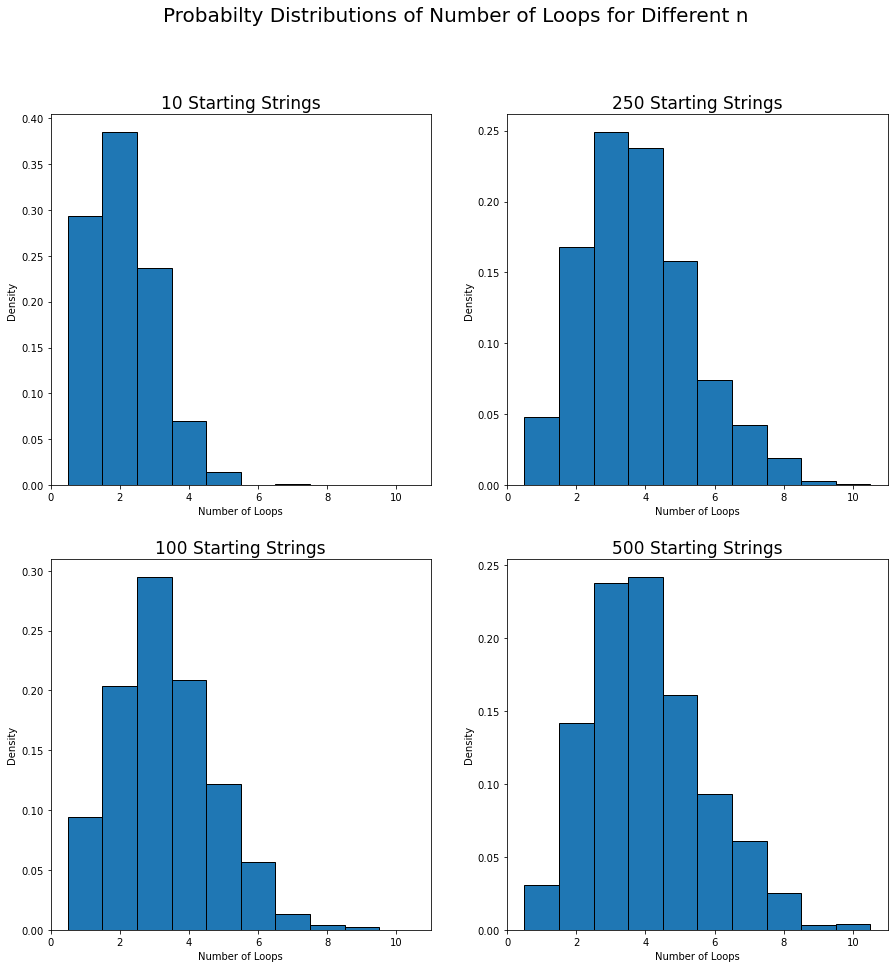

In [4]:
### Now investigating the probability distribution of the problem
# simulates game and returns the raw generated data, frequency array, probability array
def sim_prob(n, iterations):
    store = np.zeros(n)
    raw_data = []
    for _ in range(0,iterations):
        val = process_sim(n)
        store[val-1] += 1
        prob_dist = store/iterations
        raw_data.append(val)
    return raw_data, store, prob_dist

## plotting histograms for different values of n
n_vals = [10,100,250,500] # values of n we will plot
fig, ax = plt.subplots(2,2, figsize=(15,15))
fig.suptitle('Probabilty Distributions of Number of Loops for Different n', size=20)
count = 0
raw_data = []
for k in n_vals[:2]:
    freq_arr = sim_prob(k, 1000)[0]
    raw_data.append(freq_arr)
    my_bins = np.arange(0.5,11.5,1)
    ax[count][0].hist(freq_arr, my_bins, density=True, ec='k')
    count+=1
count = 0
for k in n_vals[2:]:
    freq_arr = sim_prob(k, 1000)[0]
    raw_data.append(freq_arr)
    my_bins = np.arange(0.5,11.5,1)
    ax[count][1].hist(freq_arr, my_bins, density=True, ec='k')
    count+=1
ax[0,0].set_title('10 Starting Strings', size=17)
ax[1,0].set_title('100 Starting Strings',size=17)
ax[0,1].set_title('250 Starting Strings', size=17)
ax[1,1].set_title('500 Starting Strings', size=17)

ax[0,0].set(xlabel='Number of Loops', ylabel='Density')
ax[1,0].set(xlabel='Number of Loops', ylabel='Density')
ax[0,1].set(xlabel='Number of Loops', ylabel='Density')
ax[1,1].set(xlabel='Number of Loops', ylabel='Density')

[Text(0.5, 0, 'Number of Loops'), Text(0, 0.5, 'Density')]

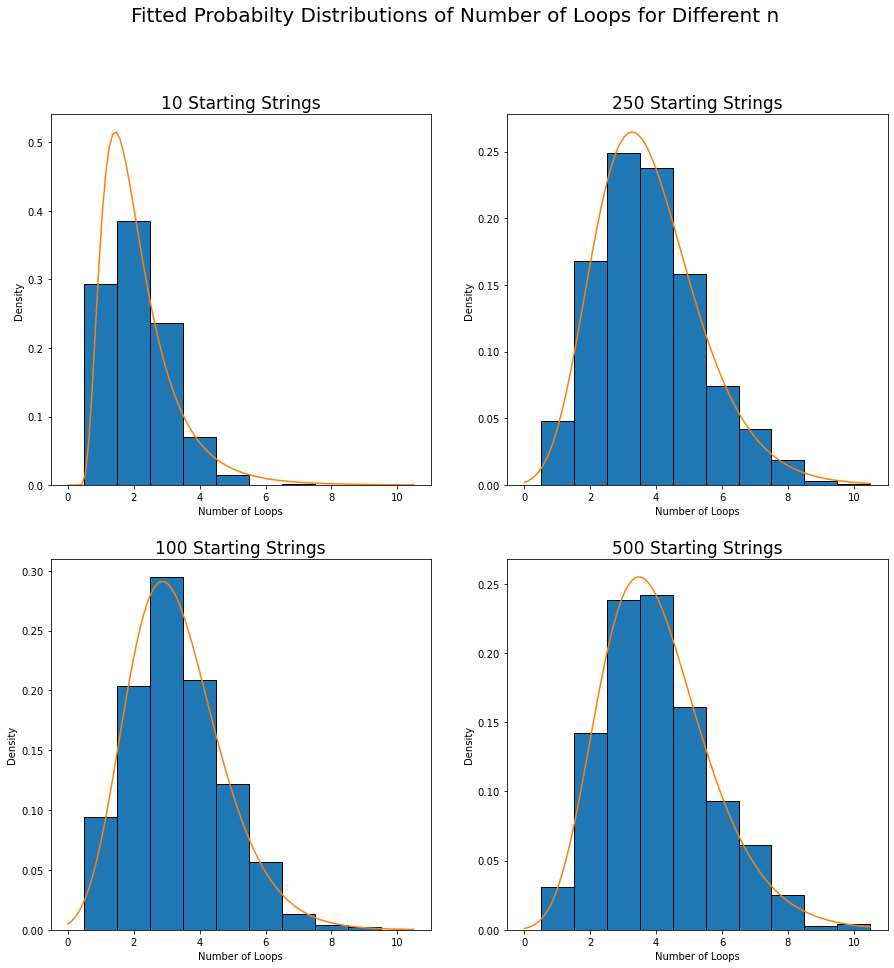

In [5]:
## Fitting the histograms above
fig2, ax2 = plt.subplots(2,2, figsize=(15,15))
fig2.suptitle('Fitted Probabilty Distributions of Number of Loops for Different n', size=20)
l = len(raw_data[0])
for i in (0,1):
    mu, loc, sd = lognorm.fit(raw_data[i])
    my_bins = np.arange(0.5,11.5,1)
    ax2[i,0].hist(raw_data[i], my_bins, density=True, ec='k')
    x = np.linspace(0,max(my_bins),101)
    ax2[i,0].plot(x, lognorm.pdf(x, mu, loc, sd))
    
for i in (0,1):
    mu, loc, sd = lognorm.fit(raw_data[i+2])
    my_bins = np.arange(0.5,11.5,1)
    ax2[i,1].hist(raw_data[i+2], my_bins, density=True, ec='k')
    x = np.linspace(0,max(my_bins),101)
    ax2[i,1].plot(x, lognorm.pdf(x, mu, loc, sd))

ax2[0,0].set_title('10 Starting Strings', size=17)
ax2[1,0].set_title('100 Starting Strings',size=17)
ax2[0,1].set_title('250 Starting Strings', size=17)
ax2[1,1].set_title('500 Starting Strings', size=17)

ax2[0,0].set(xlabel='Number of Loops', ylabel='Density')
ax2[1,0].set(xlabel='Number of Loops', ylabel='Density')
ax2[0,1].set(xlabel='Number of Loops', ylabel='Density')
ax2[1,1].set(xlabel='Number of Loops', ylabel='Density')

In [6]:
# funtion to calculate estimated probabilities for 1000 iterations
def prob_est(n, x):
    if x>n:
        return 'not valid choice'
    else:
        return sim_prob(n,1000)[2][x-1]

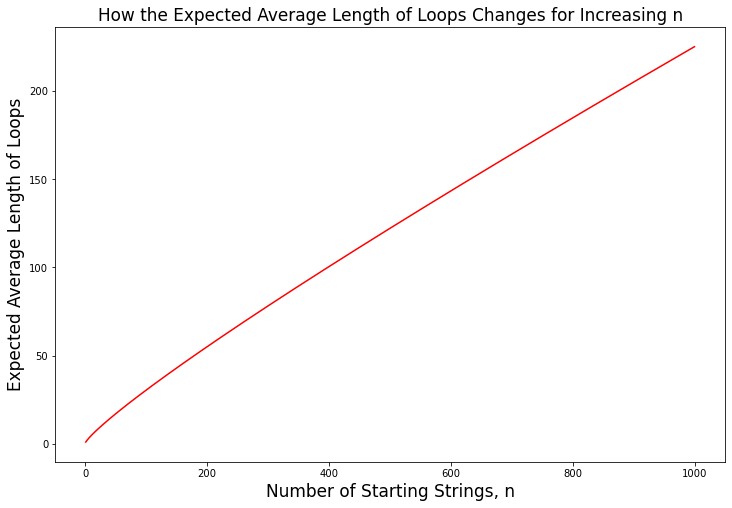

In [7]:
### Investigating lengths of Python loops
# function to calculate expected average length of a loop
def exp_ave_len(n):
    X_n = exp_loops(n)
    return n/X_n

# plotting expected average length of loops as n increases
n_range3 = np.arange(1,1000,1)
expec_len = []
for i in n_range3:
    expec_len.append(exp_ave_len(i))

plt.figure(figsize=(12,8))
plt.plot(n_range3, expec_len,'r')
plt.xlabel('Number of Starting Strings, n', size=17)
plt.ylabel('Expected Average Length of Loops', size=17)
plt.title('How the Expected Average Length of Loops Changes for Increasing n', size=17)
plt.show()